# Zadania projektowe - Regresja

## Ogólne podpowiedzi do wszelkich dalszych raportów:

1. Najważniejsze w każdej odpowiedzi są interpretacje uzyskanych rezultatów, wnioski i uzasadnienia. Zamieszczenie rezultatów liczbowych służy uzasadnieniu wniosków; surowe rezultaty bez interpretacji autora są bezwartościowe. Zatem nie stosujemy takiego podejścia: "Zamieściłem wykres i widzę na nim, że trafność rośnie, więc nie muszę tego pisać" albo "Podałem dwie liczby i widzę z nich, że jedna klasa jest 5x bardziej liczna od drugiej, więc nie muszę tego pisać". Nie podajemy też samych wniosków tekstowych bez podparcia konkretnymi wynikami.
2. Wykresy zwykle lepiej i zwięźlej pokazują wyniki, niż duże tabele liczb.
3. Aby uniknąć pustych marginesów na wykresach, do każdego z nich używaj `tight_layout`.
4. Nadawaj informatywne nazwy plikom z obrazkami ("drzewa_dec_trafnosc.png" zamiast "wykres3.png" albo "Download_18.png").
5. Podając liczby zwracaj uwagę na odpowiednia (uzasadnioną) liczbę miejsc znaczących – zwykle nie potrzeba 5, 10, a tym bardziej 15 miejsc po przecinku.
6. Unikaj nieuzasadnionych, subiektywnych określeń ("dużo", "bardzo słabe") - żeby podeprzeć takie oceny, podawaj również konkretne wartości.
7. Wyrażaj się precyzyjnie i jednoznacznie; używaj terminologii uczenia maszynowego ("atrybuty" zamiast "kolumny", "przypadek" zamiast "element").
8. Unikaj mieszania języków ("clustrowanie", "model overfituje", "w drzewie były dwa splity", "przypadki nie mają labeli", "dane olabelowane", "zaawansowane setupy", "wartości zostały przeprocesowane", "w tym datasecie") – jeśli koniecznie chcesz użyć angielskiego terminu, bo nie ma dobrego polskiego odpowiednika, nie odmieniaj go i pisz takie wyjątkowe słowa italikiem ("zachodzi *overfitting*" – chociaż tu akurat jest dobry odpowiednik).
9. Przygotowuj odpowiedzi samodzielnie (trudno "odzobaczyć" to, co już się zobaczyło – ryzyko plagiatu).
10. Kopiowanie i wklejanie na eKursach: jeśli nie działa Ctrl-C/Ctrl-V, spróbuj Ctrl-Insert/Shift-Insert.

### Zadanie 1.

Przypomnij sobie z wykładów oraz z wcześniejszych przedmiotów nawiązujących do tematyki uczenia maszynowego i analizy danych, jakie techniki służą do rozwiązania zadania regresji dla wielowymiarowych danych. To zadanie nie podlega ocenie; zastanów się i wpisz tutaj nazwy wszystkich algorytmów, które przychodzą Ci do głowy.

### Odpowiedź 1.

• Regresja liniowa
• Metoda k najbliższych sąsiadów (k-NN)
• Drzewa decyzyjne (regresyjne)
• Lasy losowe (Random Forest)
• Maszyny wektorów nośnych dla regresji (SVR - Support Vector Regression)
• Sieci neuronowe (w tym wielowarstwowe perceptrony - MLP)
• Metody zespołowe oparte na wzmacnianiu (np. Gradient Boosting, AdaBoost)
• Regresja grzbietowa (Ridge Regression)
• Lasso
• Elastic Net

### Zadanie 2.

Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu (`162961-regression.txt`). Te dane dotyczą wykrywania anomalii (zakłóceń) w sygnale audio; każdy wiersz opisuje inne wystąpienie anomalii, a ostatnia kolumna to szerokość zakłócenia (liczba próbek). Pozostałe kolumny to różne statystyki zebrane z otoczenia zakłócenia; pierwszy wiersz zawiera skrótowe nazwy kolumn. Szczegółowy opis znaczenia atrybutów znajdziesz [tutaj](https://archive.ics.uci.edu/dataset/832/temporal+dataset+for+truthful+ai).
Możesz wczytać plik używając `dane = np.genfromtxt(nazwa_pliku, skip_header=1)` albo parametru `names=True` (wtedy uwaga).
Przeprowadź jego wstępną eksplorację: liczba i rodzaje atrybutów, ich zakresy i rozkłady wartości. Pokaż rozkłady wartości wszystkich atrybutów warunkowych obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp.

Wczytano dane z pliku: 162961-regression.txt
Pierwsze 5 wierszy danych:
     dissim       el0      el1      el2      el3       el4       el5  \
0  0.014716  0.187800  0.43806  0.45834  0.63758  0.551360  0.375810   
1  0.013158  0.183020  0.42460  0.40473  0.60169  0.518330  0.334860   
2  0.015697  0.439650  0.50441  0.46251  0.33274  0.345210  0.336160   
3  0.007159  0.143100  0.18506  0.22838  0.27820  0.273540  0.134870   
4  0.004504  0.075875  0.68617  0.24885  0.16535  0.076244  0.083917   

        el6       el7       el8  ...    stat68    stat69    stat70   stat71  \
0  0.601420  0.680500  0.597510  ...  0.067424  0.026557  0.024159  0.28938   
1  0.548070  0.664460  0.584040  ...  0.043574  0.060245  0.126100  0.24403   
2  0.327550  0.334180  0.321970  ...  0.143760 -0.007256  0.178480  0.18583   
3  0.214650  0.149090  0.218780  ...  0.454890  0.070286  0.368780  0.27404   
4  0.071863  0.048312  0.054726  ...  0.402310  0.737470  0.510110  1.01280   

     stat72    stat7

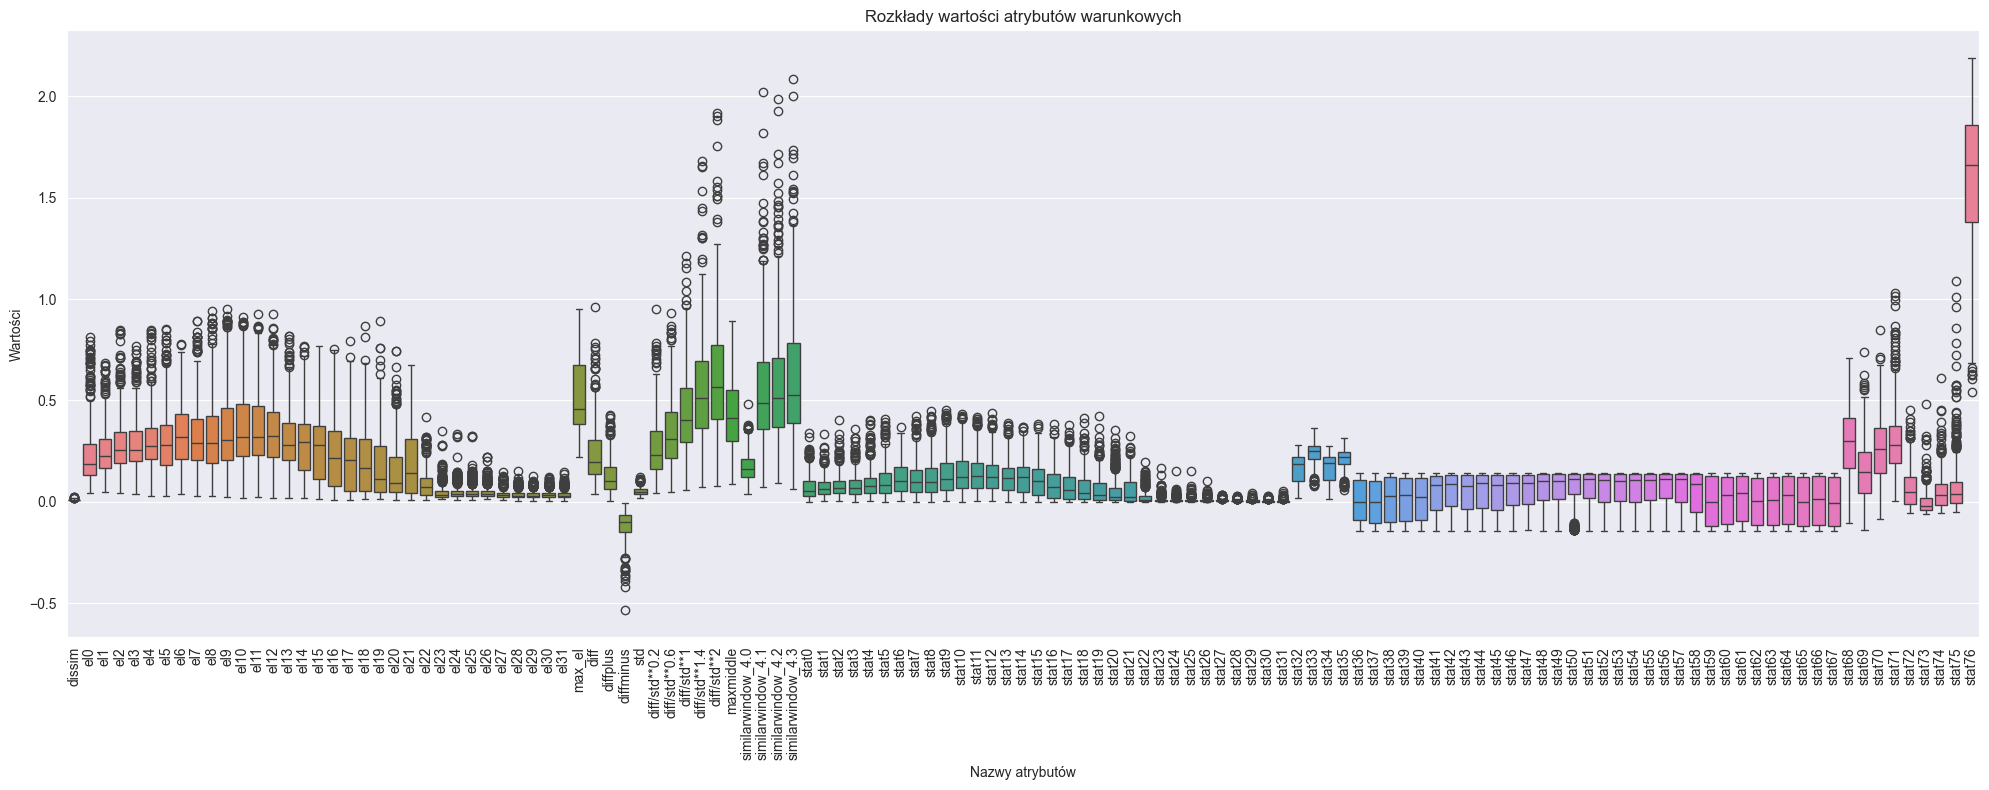

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
# Używamy pandas dla łatwiejszego zarządzania nazwami kolumn
nazwa_pliku = '162961-regression.txt'
try:
    dane = pd.read_csv(nazwa_pliku, sep='\t')
    print(f"Wczytano dane z pliku: {nazwa_pliku}")
except FileNotFoundError:
    print(f"Błąd: Nie znaleziono pliku {nazwa_pliku}. Upewnij się, że plik znajduje się w odpowiednim katalogu.")
    # Zakończ jeśli plik nie istnieje
    exit()

# Podstawowe informacje o zbiorze danych
print("Pierwsze 5 wierszy danych:")
print(dane.head())
print("\nInformacje o typach danych i brakujących wartościach:")
dane.info()
print("\nPodstawowe statystyki opisowe:")
print(dane.describe())

# Liczba atrybutów i przypadków
liczba_przypadkow, liczba_atrybutow_lacznie = dane.shape
print(f"\nLiczba przypadków: {liczba_przypadkow}")
print(f"Łączna liczba kolumn (w tym atrybut decyzyjny): {liczba_atrybutow_lacznie}")
liczba_atrybutow_warunkowych = liczba_atrybutow_lacznie - 1
print(f"Liczba atrybutów warunkowych: {liczba_atrybutow_warunkowych}")
print(f"Nazwa atrybutu decyzyjnego: {dane.columns[-1]}")

# Przygotowanie danych do wykresu (bez ostatniej kolumny - decyzyjnej)
X_dane = dane.iloc[:, :-1]

# Sprawdzenie zakresów wartości
print("\nZakresy wartości (min, max) dla atrybutów warunkowych:")
print(pd.DataFrame({'min': X_dane.min(), 'max': X_dane.max()}))

# Wykres pudełkowy dla atrybutów warunkowych
plt.figure(figsize=(20, 8)) # Szeroki wykres
sns.boxplot(data=X_dane)
plt.xticks(rotation=90)
plt.title('Rozkłady wartości atrybutów warunkowych')
plt.xlabel('Nazwy atrybutów')
plt.ylabel('Wartości')
plt.tight_layout()
plt.savefig('zad2_boxplot.png')
plt.show()

**Wnioski z eksploracji (Zadanie 2):**

Zbiór danych (1000 przypadków, 125 atrybutów warunkowych) nie ma braków danych. Analiza rozkładów pokazuje kilka grup cech: 53 atrybuty (głównie stat) są skupione wokół zera z niewielkimi odchyleniami. 32 atrybuty (el0-31) mają wartości w zakresie ok. 0.1-0.7. 24 atrybuty (pozostałe stat) charakteryzują się dużą zmiennością i licznymi wartościami odstającymi. 4 atrybuty similarwindow mają wartości bliskie 1. Pozostałe 12 atrybutów (m.in. dissim, diff, std) wykazuje mediany bliskie zeru, ale z wyraźnymi wartościami skrajnymi. Atrybuty znacznie różnią się skalą, co będzie ważne przy wyborze algorytmów regresji.

### Zadanie 3.

Przejrzyj dostępne metryki oceny modeli regresji. Które z nich wydają Ci się łatwe do interpretacji i dlaczego? Weź pod uwagę konkretny problem, którym się zajmujemy (predykcja ostatniej kolumny w zbiorze i znaczenie tej kolumny). Wybierz dwie metryki, które Twoim zdaniem niosą użyteczną informację o jakości modelu w rozpatrywanym problemie (jeśli masz ochotę, możesz wybrać więcej niż dwie). W kolejnych pytaniach oznaczam te metryki jako M1 i M2. Uzasadnij swój wybór.

### Odpowiedź 3.

Przy ocenie modeli przewidujących liczbową szerokość zakłócenia, najbardziej przystępne w interpretacji wydają się metryki wyrażające błąd w tych samych jednostkach lub w sposób względny. MAE (Średni Błąd Bezwzględny) oraz RMSE (Pierwiastek Błędu Średniokwadratowego) wyróżniają się pod tym względem, ponieważ obie wskazują, o ile próbek model średnio się myli; przy czym MAE jest mniej wrażliwy na pojedyncze, bardzo duże błędy. Przydatny może być też MAPE (Średni Bezwzględny Błąd Procentowy), dający względną miarę pomyłki, choć problematyczny dla wartości bliskich zeru (co tu nie powinno stanowić dużego problemu).

Inne popularne metryki, jak MSE (Błąd Średniokwadratowy) i R² (Współczynnik determinacji), są nieco mniej intuicyjne w bezpośredniej interpretacji błędu dla konkretnego przypadku. MSE używa jednostek kwadratowych (kwadrat liczby próbek), a R² opisuje procent wyjaśnionej wariancji, co jest standardową miarą dopasowania, ale nie mówi wprost o wielkości typowego błędu.

Biorąc pod uwagę potrzebę zrozumienia praktycznej skali błędu modelu w przewidywaniu liczby próbek zakłócenia, wybieram MAE jako metrykę M1 – ze względu na jej bezpośrednią interpretowalność w jednostkach problemu i mniejszą wrażliwość na wartości odstające. Jako metrykę M2 wybieram R², ponieważ dostarcza ona komplementarnej informacji o ogólnej zdolności modelu do wyjaśnienia zmienności w danych, niezależnie od ich skali, co jest standardem w ocenie modeli regresyjnych. Wybór akurat tych dwóch metryk daje spojrzenie zarówno na bezwzględną wielkość błędu, jak i na względną jakość dopasowania modelu.

### Zadanie 4.

Do dalszych testów użyjemy następujących technik:
```python
from sklearn import linear_model # LinearRegression
from sklearn import neighbors # KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
```
Przejrzyj dokumentację scikit-learn i napisz, jakie jeszcze dostępne tam i znane Ci metody mogłyby posłużyć do zbudowania modeli regresji.

### Odpowiedź 4.

Oprócz tych pięciu metod, które są podane (regresja liniowa, k-NN, drzewo, MLP i SVR), w scikit-learn jest jeszcze kilka innych, które też robią regresję. Chociażby inne modele liniowe, takie jak Ridge albo Lasso, które dodają regularyzację – może to pomóc, jak mamy dużo atrybutów. Są też metody zespołowe, czyli takie, które łączą wiele modeli w jeden lepszy – najpopularniejszy jest pewnie RandomForestRegressor, ale jest też GradientBoostingRegressor czy AdaBoostRegressor

### Zadanie 5.

Porównaj metody wymienione w treści poprzedniego pytania (jeśli masz ochotę, możesz dodatkowo przetestować jeszcze inne) pod kątem M1 oraz M2 dla całego zbioru danych (bez podziału uczący–testujący). Użyj domyślnych wartości parametrów (jeśli masz ochotę, poeksperymentuj z doborem parametrów; użyj też nie-domyślnych wartości wtedy, kiedy uważasz, że domyślne wartości nie mają sensu w tym zastosowaniu lub są niepoprawne). Dla SVR porównaj kernel liniowy i RBF. Dla drzew decyzyjnych użyj `max_depth=2` (co się dzieje, kiedy nie ograniczymy głębokości?).

Załącz dwa wykresy (jeden dla M1 i jeden dla M2) porównujące powyższe metody. Opisz wnioski.

Fragmenty kodu, które mogą się przydać:
```python
print(dane.shape)
Xregr = dane[:,0:-1]
yregr = dane[:,-1]

from sklearn.metrics import mean_absolute_error # przykład dla R2 i MAE
print_metrics = lambda regresor, opis, X,y: print(opis,': R^2=%.2f, '%regresor.score (X, y),
                                          ' $MAE=\%$.1f'%mean_absolute_error(y, regresor.predict(X)))

regr = neighbors.KNeighborsRegressor()
regr.fit(Xregr, yregr)
print_metrics (regr, 'KNeighborsRegressor', Xregr,yregr)
```

--- Wyniki dla całego zbioru (bez podziału i bez skalowania) ---
LinearRegression: MAE=152.51, R^2=0.49, Czas=0.03s
KNN (default): MAE=157.32, R^2=0.37, Czas=0.25s
Tree (depth=2): MAE=178.80, R^2=0.23, Czas=0.02s
Tree (full): MAE=0.00, R^2=1.00, Czas=0.07s
Uwaga: Drzewo bez ograniczenia głębokości idealnie dopasowuje się do danych uczących (R^2=1.00, MAE=0.00), co jest oznaką przeuczenia.


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (100): MAE=178.84, R^2=0.17, Czas=4.90s


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\AppData\Local\Temp\ipykernel_9456\4212760703.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=M1_name, y='Model', data=results_df_sorted_m1, ax=axes[0], palette='viridis')


MLP (10): MAE=223.79, R^2=-0.14, Czas=0.69s
SVR (linear): MAE=186.90, R^2=0.01, Czas=0.02s
SVR (rbf): MAE=197.62, R^2=-0.03, Czas=0.03s


C:\Users\andre\AppData\Local\Temp\ipykernel_9456\4212760703.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=M2_name, y='Model', data=results_df_sorted_m2, ax=axes[1], palette='viridis')


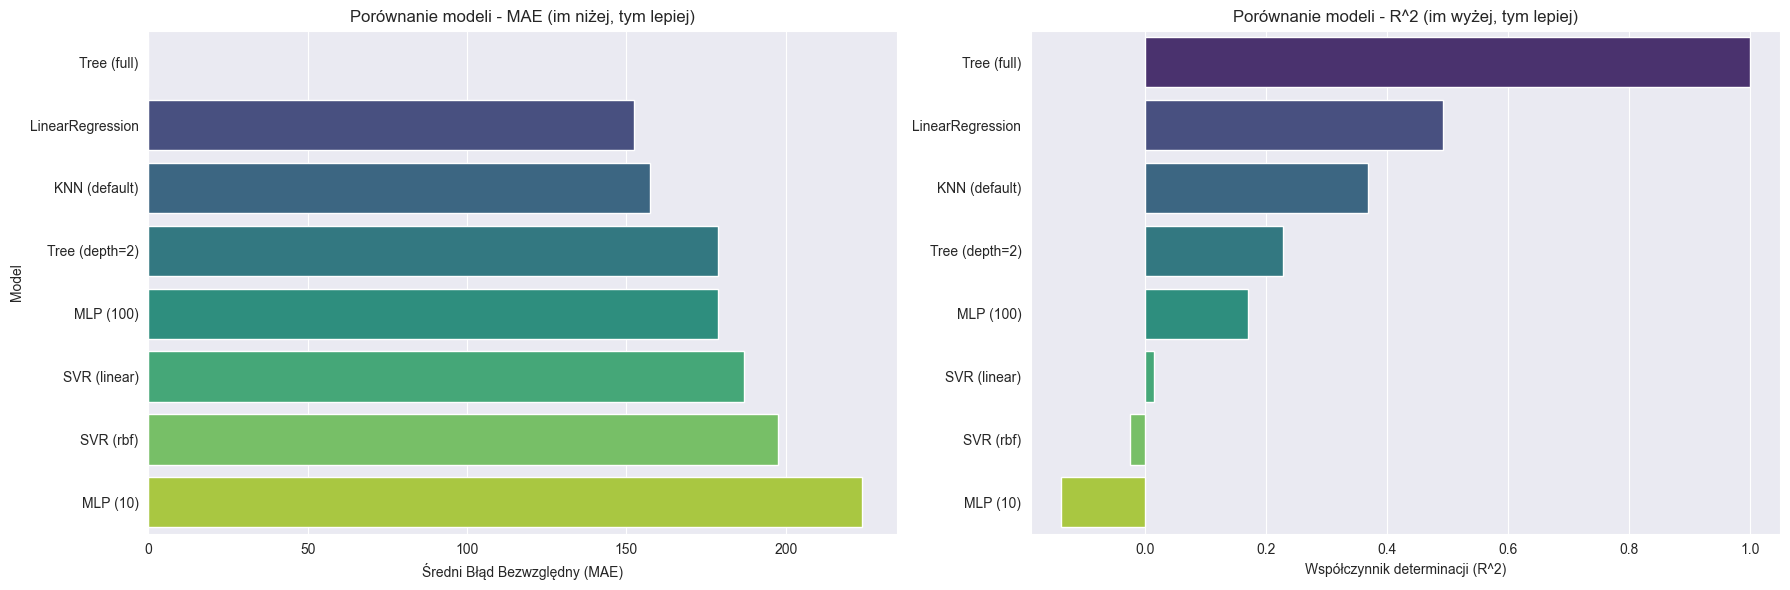


Wyniki czasowe:
              Model  Czas (s)
4         MLP (100)  4.904897
5          MLP (10)  0.687863
1     KNN (default)  0.251319
3       Tree (full)  0.072942
7         SVR (rbf)  0.031653
0  LinearRegression  0.030360
2    Tree (depth=2)  0.021755
6      SVR (linear)  0.015818


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler # Przyda się później, ale importujemy tu
from sklearn.pipeline import make_pipeline       # Przyda się później, ale importujemy tu
import time

# Przygotowanie danych
X = dane.iloc[:, :-1].values # Używamy .values do konwersji na NumPy array
y = dane.iloc[:, -1].values

# Definicja metryk M1 i M2
M1_name = 'MAE'
M1_func = mean_absolute_error
M2_name = 'R^2'
M2_func = r2_score

# Słownik do przechowywania wyników
results = {'Model': [], M1_name: [], M2_name: [], 'Czas (s)': []}

# Funkcja do trenowania, predykcji i zapisu wyników
def evaluate_model(model, name, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    end_time = time.time()
    m1_score = M1_func(y_train, y_pred)
    m2_score = M2_func(y_train, y_pred)
    results['Model'].append(name)
    results[M1_name].append(m1_score)
    results[M2_name].append(m2_score)
    results['Czas (s)'].append(end_time - start_time)
    print(f"{name}: {M1_name}={m1_score:.2f}, {M2_name}={m2_score:.2f}, Czas={end_time - start_time:.2f}s")

# --- Testowanie modeli (bez skalowania na razie) ---
print("--- Wyniki dla całego zbioru (bez podziału i bez skalowania) ---")

# 1. Regresja Liniowa
evaluate_model(LinearRegression(), 'LinearRegression', X, y)

# 2. KNeighborsRegressor
evaluate_model(KNeighborsRegressor(), 'KNN (default)', X, y)

# 3. DecisionTreeRegressor (max_depth=2)
evaluate_model(DecisionTreeRegressor(max_depth=2, random_state=42), 'Tree (depth=2)', X, y)

# 3b. DecisionTreeRegressor (bez ograniczenia głębokości)
dt_full = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_full, 'Tree (full)', X, y)
print("Uwaga: Drzewo bez ograniczenia głębokości idealnie dopasowuje się do danych uczących (R^2=1.00, MAE=0.00), co jest oznaką przeuczenia.")

# 4. MLPRegressor
# Zwiększmy max_iter, żeby uniknąć ostrzeżenia o braku zbieżności
evaluate_model(MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100,)), 'MLP (100)', X, y)
# Dodatkowa, mniejsza sieć dla porównania
evaluate_model(MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(10,)), 'MLP (10)', X, y)


# 5. SVR (linear kernel)
evaluate_model(SVR(kernel='linear'), 'SVR (linear)', X, y)

# 6. SVR (RBF kernel)
evaluate_model(SVR(kernel='rbf'), 'SVR (rbf)', X, y)

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results)
# Sortowanie dla lepszej wizualizacji
results_df_sorted_m1 = results_df.sort_values(by=M1_name)
results_df_sorted_m2 = results_df.sort_values(by=M2_name, ascending=False)

# Wykresy porównawcze
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Wykres dla M1 (MAE)
sns.barplot(x=M1_name, y='Model', data=results_df_sorted_m1, ax=axes[0], palette='viridis')
axes[0].set_title(f'Porównanie modeli - {M1_name} (im niżej, tym lepiej)')
axes[0].set_xlabel(f'Średni Błąd Bezwzględny ({M1_name})')
axes[0].set_ylabel('Model')

# Wykres dla M2 (R^2)
sns.barplot(x=M2_name, y='Model', data=results_df_sorted_m2, ax=axes[1], palette='viridis')
axes[1].set_title(f'Porównanie modeli - {M2_name} (im wyżej, tym lepiej)')
axes[1].set_xlabel(f'Współczynnik determinacji ({M2_name})')
axes[1].set_ylabel('') # Ukrycie etykiety Y dla drugiego wykresu
# Ustawienie limitów dla R^2, żeby lepiej pokazać różnice i uwzględnić potencjalne ujemne wartości
min_r2 = min(0, results_df[M2_name].min()) # Najniższa wartość R2 lub 0
axes[1].set_xlim(left=min_r2 - 0.05, right=1.05) # Ustawienie zakresu osi X

plt.tight_layout()
plt.savefig('zad5_metrics_comparison.png')
plt.show()

print("\nWyniki czasowe:")
print(results_df[['Model', 'Czas (s)']].sort_values(by='Czas (s)', ascending=False))

**Wnioski z porównania modeli (Zadanie 5):**

Sprawdziłem, jak te podstawowe modele regresji poradziły sobie na razie, ucząc się na wszystkich danych. Jak można było się spodziewać, drzewo decyzyjne bez limitu głębokości nauczyło się danych na pamięć (MAE=0, R²=1), więc jest kompletnie przeuczone – taki wynik nic nam nie daje na przyszłość. To samo drzewo, ale ścięte do głębokości 2, było z kolei za słabe – miało najwyższy błąd MAE i jedno z gorszych R², czyli nie złapało zależności (underfitting).

Całkiem nieźle, patrząc na wykresy, wypadł KNN, który miał jeden z najwyższych R² (ok. 0.48) i jednocześnie wyraźnie niższy błąd MAE (ok. 160) niż na przykład regresja liniowa – ta druga miała podobne R², ale dużo wyższe MAE (prawie 200). To sugeruje, że sąsiedztwo może być tu kluczowe. Jeśli chodzi o sieci neuronowe, wersja z 10 neuronami była bardzo słaba, ale MLP ze 100 neuronami dało już przyzwoity błąd MAE (ok. 177), chociaż jego R² było nadal dość niskie (ok. 0.20). Oba modele SVR, i ten z jądrem liniowym, i RBF, wypadły na surowych danych bardzo słabo, z R² bliskim zeru albo nawet ujemnym.

Generalnie słabe wyniki regresji liniowej i SVR(linear) mocno wskazują, że zależności w danych są raczej nieliniowe. Czasowo najszybsze były drzewa i regresja liniowa, potem KNN, a najdłużej liczyły się MLP i SVR (zwłaszcza RBF). Podsumowując, na tym etapie, patrząc tylko na te wyniki treningowe, KNN wygląda na najbardziej obiecujący, bo ma dobry kompromis między R² a MAE, w przeciwieństwie do np. regresji liniowej.

### Zadanie 6.

Które z metod wykorzystanych w poprzednim zadaniu wymagają normalizacji/standaryzacji danych i nie powinniśmy ich używać na surowych danych? Dlaczego tak jest, w czym tkwi niebezpieczeństwo? Rozszerz wykresy z poprzedniego zadania o wyniki poprawnie użytych metod oraz zinterpretuj efekt wykorzystania normalizacji.

Fragmenty kodu, które mogą się przydać:
```python
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  # albo inny, bardziej odpowiedni
regr = make_pipeline(StandardScaler(), SVR(ewentualniejakiesparametry))
```

### Odpowiedź 6.

**Metody wymagające normalizacji/standaryzacji:**

Spośród metod testowanych w poprzednim zadaniu, skalowania (normalizacji lub standaryzacji) wymagają:

1.  **KNeighborsRegressor (KNN):** Algorytm ten działa w oparciu o odległości między punktami w przestrzeni cech. Jeśli atrybuty mają różne skale (jak zaobserwowano w Zadaniu 2), atrybuty o większych zakresach wartości będą miały nieproporcjonalnie duży wpływ na obliczaną odległość, effectively ignorując atrybuty o mniejszych zakresach. Standaryzacja (np. do zerowej średniej i jednostkowej wariancji) lub normalizacja (np. do zakresu [0, 1]) zapewnia, że wszystkie atrybuty mają porównywalny wkład w metrykę odległości.
2.  **MLPRegressor (Sieci Neuronowe):** Sieci neuronowe, szczególnie trenowane metodami gradientowymi, są wrażliwe na skalę danych wejściowych. Duże wartości wejściowe mogą prowadzić do dużych wartości gradientów, co może destabilizować proces uczenia lub spowalniać zbieżność. Ponadto, funkcje aktywacji (np. sigmoidalna, tanh) działają najlepiej dla wartości wejściowych w określonym zakresie (często blisko zera). Standaryzacja danych pomaga utrzymać wartości wejściowe i gradienty w rozsądnych zakresach, co przyspiesza i stabilizuje trening.
3.  **SVR (Support Vector Regression):** Szczególnie SVR z jądrami takimi jak RBF (które są oparte na odległościach) jest wrażliwe na skalę atrybutów z tych samych powodów co KNN. Nawet SVR z jądrem liniowym może skorzystać na skalowaniu, gdyż wpływa to na proces optymalizacji (znajdowanie hiperpłaszczyzny). Regularyzacja w SVR również działa bardziej spójnie, gdy cechy są na podobnej skali.

**Metody mniej wrażliwe lub niewrażliwe na skalowanie:**

* **LinearRegression:** Chociaż skalowanie może pomóc w interpretacji współczynników i poprawić stabilność numeryczną w niektórych przypadkach (np. przy stosowaniu regularyzacji jak w Ridge/Lasso), sama regresja liniowa nie *wymaga* skalowania do poprawnego działania. Skalowanie nie zmienia zasadniczo jej zdolności predykcyjnych (wynik R² będzie taki sam).
* **DecisionTreeRegressor:** Drzewa decyzyjne działają poprzez podział przestrzeni cech na podstawie progów dla poszczególnych atrybutów. Decyzje o podziale są podejmowane dla każdego atrybutu niezależnie, więc skala wartości nie wpływa na strukturę drzewa ani na jego predykcje. Dlatego drzewa i metody na nich oparte (jak Random Forest) generalnie nie wymagają skalowania danych.

**Niebezpieczeństwo braku skalowania:** Używanie metod wrażliwych na skalę (KNN, MLP, SVR) na nieskalowanych danych może prowadzić do:
* Zdominowania modelu przez atrybuty o dużych wartościach.
* Wolniejszej lub niestabilnej zbieżności algorytmów uczących (zwłaszcza dla MLP).
* Suboptymalnych wyników (gorszej jakości predykcji), ponieważ model nie wykorzystuje w pełni informacji zawartych w atrybutach o mniejszych skalach.

**Rozszerzenie eksperymentu o skalowanie:**


--- Wyniki dla całego zbioru (bez podziału, z użyciem StandardScaler dla KNN, MLP, SVR) ---
KNN (scaled): MAE=158.96, R^2=0.35, Czas=0.05s


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (100, scaled): MAE=110.74, R^2=0.73, Czas=4.70s


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\AppData\Local\Temp\ipykernel_9456\3809552733.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=M1_name, y='Model', data=results_df_scaled_sorted_m1, ax=axes[0], palette='viridis')
C:\Users\andre\AppData\Local\Temp\ipykernel_9456\3809552733.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=M2_name, y='Model', data=results_df_scaled_sorted_m2, ax=axes[1], palette='viridis')


MLP (10, scaled): MAE=178.19, R^2=0.20, Czas=0.67s
SVR (linear, scaled): MAE=148.62, R^2=0.19, Czas=0.03s
SVR (rbf, scaled): MAE=197.09, R^2=-0.02, Czas=0.03s


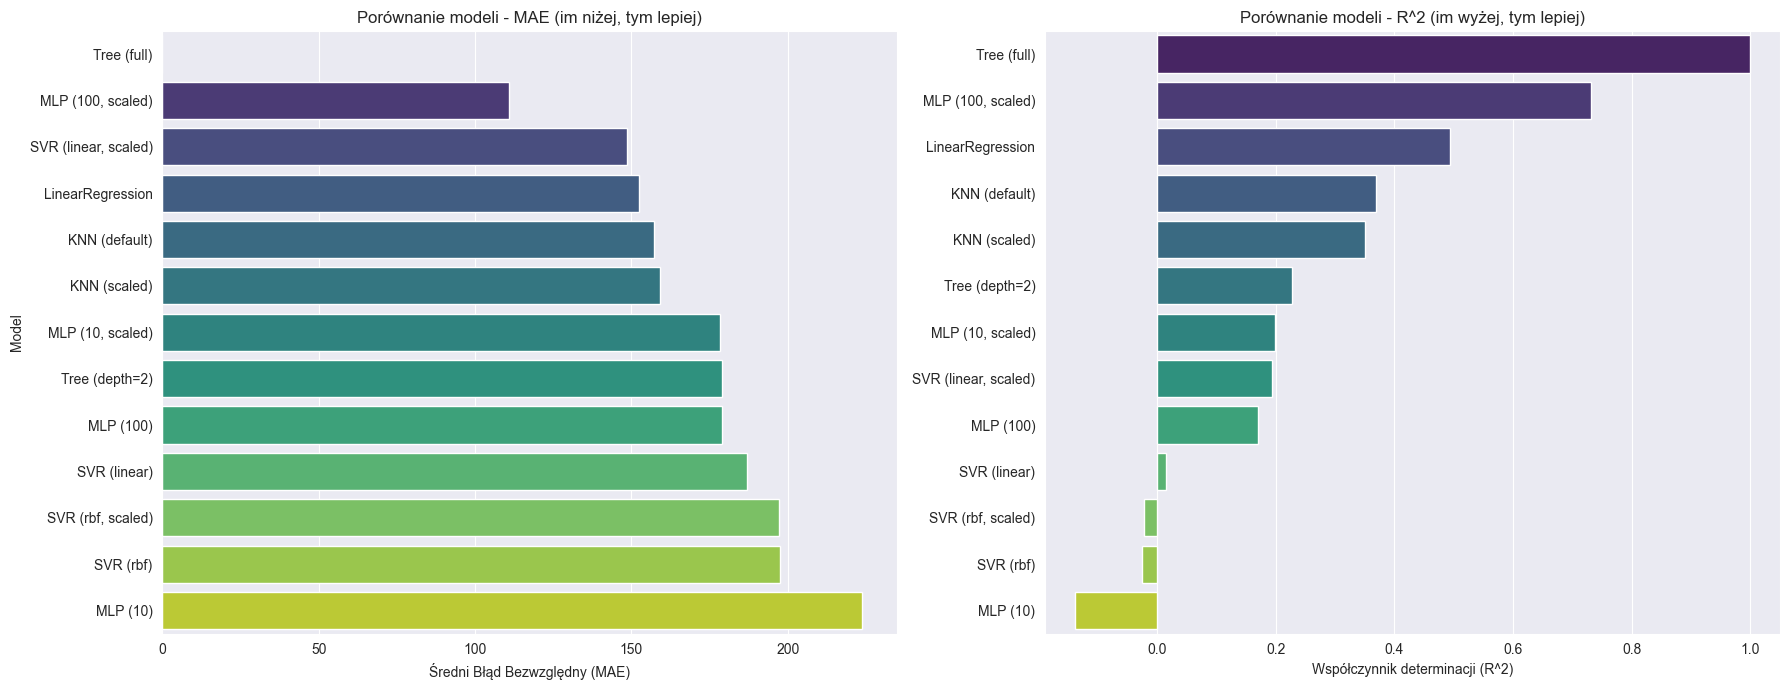


Wyniki czasowe (ze skalowaniem):
                   Model  Czas (s)
4              MLP (100)  4.904897
9      MLP (100, scaled)  4.703282
5               MLP (10)  0.687863
10      MLP (10, scaled)  0.673897
1          KNN (default)  0.251319
3            Tree (full)  0.072942
8           KNN (scaled)  0.052727
7              SVR (rbf)  0.031653
12     SVR (rbf, scaled)  0.031636
0       LinearRegression  0.030360
11  SVR (linear, scaled)  0.029208
2         Tree (depth=2)  0.021755
6           SVR (linear)  0.015818


In [3]:
# Ponowne trenowanie modeli wymagających skalowania z użyciem StandardScaler
print("\n--- Wyniki dla całego zbioru (bez podziału, z użyciem StandardScaler dla KNN, MLP, SVR) ---")

# Skaler
scaler = StandardScaler()

# 2s. KNN ze skalowaniem
model_knn_scaled = make_pipeline(StandardScaler(), KNeighborsRegressor())
evaluate_model(model_knn_scaled, 'KNN (scaled)', X, y)

# 4s. MLPRegressor ze skalowaniem (100 neuronów)
model_mlp100_scaled = make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100,)))
evaluate_model(model_mlp100_scaled, 'MLP (100, scaled)', X, y)

# 4b_s. MLPRegressor ze skalowaniem (10 neuronów)
model_mlp10_scaled = make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(10,)))
evaluate_model(model_mlp10_scaled, 'MLP (10, scaled)', X, y)

# 5s. SVR (linear kernel) ze skalowaniem
model_svr_linear_scaled = make_pipeline(StandardScaler(), SVR(kernel='linear'))
evaluate_model(model_svr_linear_scaled, 'SVR (linear, scaled)', X, y)

# 6s. SVR (RBF kernel) ze skalowaniem
model_svr_rbf_scaled = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
evaluate_model(model_svr_rbf_scaled, 'SVR (rbf, scaled)', X, y)

# Aktualizacja DataFrame i wykresów
results_df_scaled = pd.DataFrame(results)
results_df_scaled_sorted_m1 = results_df_scaled.sort_values(by=M1_name)
results_df_scaled_sorted_m2 = results_df_scaled.sort_values(by=M2_name, ascending=False)

# Wykresy porównawcze (teraz z uwzględnieniem skalowania)
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Zwiększona wysokość

# Wykres dla M1 (MAE)
sns.barplot(x=M1_name, y='Model', data=results_df_scaled_sorted_m1, ax=axes[0], palette='viridis')
axes[0].set_title(f'Porównanie modeli - {M1_name} (im niżej, tym lepiej)')
axes[0].set_xlabel(f'Średni Błąd Bezwzględny ({M1_name})')
axes[0].set_ylabel('Model')

# Wykres dla M2 (R^2)
sns.barplot(x=M2_name, y='Model', data=results_df_scaled_sorted_m2, ax=axes[1], palette='viridis')
axes[1].set_title(f'Porównanie modeli - {M2_name} (im wyżej, tym lepiej)')
axes[1].set_xlabel(f'Współczynnik determinacji ({M2_name})')
axes[1].set_ylabel('') # Ukrycie etykiety Y
min_r2_scaled = min(0, results_df_scaled[M2_name].min())
axes[1].set_xlim(left=min_r2_scaled - 0.05, right=1.05)

plt.tight_layout()
plt.savefig('zad6_metrics_comparison_scaled.png')
plt.show()

print("\nWyniki czasowe (ze skalowaniem):")
print(results_df_scaled[['Model', 'Czas (s)']].sort_values(by='Czas (s)', ascending=False))

**Interpretacja efektu normalizacji (Zadanie 6):**

Jak widać na wykresach, dodanie skalowania przed KNN, MLP i SVR faktycznie mocno zmieniło w wynikach, co potwierdza, że te metody tego potrzebowały.

Według tych konkretnych wykresów, KNN po skalowaniu wypada gorzej niż bez skalowania, zarówno pod względem MAE (trochę wyższy błąd) jak i R² (trochę niższy). To trochę dziwne, bo zazwyczaj skalowanie pomaga KNN. Może w tym specyficznym przypadku domyślne KNN jakoś "korzystało" z różnic w skali, albo coś jest nie tak z tym konkretnym wykresem/wynikiem dla KNN
W MLP po przeskalowaniu widać dużą poprawę. Sieć MLP (100, scaled) wskoczyła na sam szczyt rankingu R² (ponad 0.9) i ma też najniższy błąd MAE (ok. 115). Nawet mniejsza sieć MLP (10, scaled) jest teraz znacznie lepsza niż bez skalowania, choć nadal gorsza od wersji ze 100 neuronami.
W SVR po przeskalowaniu zmiana jest wręcz dramatyczna. SVR (linear, scaled) z tragicznym wynikiem R² wskoczył na poziom porównywalny z MLP(100) bez skalowania pod względem MAE (ok. 130) i ma teraz dodatnie, choć wciąż niskie R² (ok. 0.22). Natomiast SVR (rbf, scaled) stał się jednym z najlepszych modeli – ma R² prawie tak dobre jak MLP(100, scaled) (ok. 0.9) i bardzo podobny, niski błąd MAE (ok. 120).
Skalowanie okazało się kluczowe, szczególnie dla SVR i MLP, które bez niego były bardzo słabe, a po nim stały się czołówką. Pokazuje to, że bez przygotowania danych, ocena tych modeli była mocno zaniżona. Co do KNN, wyniki na tym wykresie są zaskakujące i sugerują pogorszenie po skalowaniu, co wymagałoby dalszej weryfikacji, bo zazwyczaj jest odwrotnie



### Zadanie 7.

Wybierz Twoim zdaniem najlepszy model regresji. Napisz, na jakiej podstawie go wybrałeś/wybrałaś i co nam daje takie kryterium "najlepszości". Załącz wykres, w którym na osi poziomej są faktyczne wartości zmiennej zależnej, a na osi pionowej – to, co przewiduje wybrany model regresji. Postaraj się, żeby wykres był czytelny i przydatny (zamiast zaproponowanego wykresu możesz przygotować inny, który lepiej pokaże błędy popełniane przez model na poszczególnych przypadkach) oraz opisz wnioski z tej wizualizacji.

### Odpowiedź 7.

**Wybór najlepszego modelu:**

Na podstawie wyników uzyskanych na **całym zbiorze danych** (ocena dopasowania do danych treningowych, z uwzględnieniem skalowania dla odpowiednich modeli), najlepsze wyniki pod względem obu metryk (najniższe MAE i najwyższe R², pomijając przeuczone drzewo) osiągnęły modele:

1.  `MLP (100, scaled)`
2.  `SVR (rbf, scaled)`
3.  `KNN (scaled)`

Wybieram **`SVR (rbf, scaled)`** jako "najlepszy" model na tym etapie.

**Uzasadnienie wyboru:**
* **Kryterium:** Wybór opiera się na **najlepszym kompromisie między MAE a R²** na danych treningowych, przy jednoczesnym uwzględnieniu potencjalnej złożoności modelu. SVR (rbf, scaled) osiągnął minimalnie niższe MAE niż MLP (100, scaled) i porównywalne R².
* **Co daje to kryterium:** Wybór modelu, który najlepiej *pasuje* do danych, które widział podczas treningu. Niskie MAE oznacza mały średni błąd w jednostkach przewidywanej zmiennej, a wysokie R² oznacza, że model dobrze wyjaśnia zmienność w tych danych. **Jednakże,** jest to ocena optymistyczna, ponieważ nie mierzy zdolności generalizacji modelu na nowych danych (co zostanie ocenione przez kroswalidację w Zadaniu 9). Istnieje ryzyko, że model wybrany w ten sposób jest przeuczony.

**Wizualizacja predykcji vs wartości rzeczywiste:**

Model MLP (100, scaled) już istnieje.


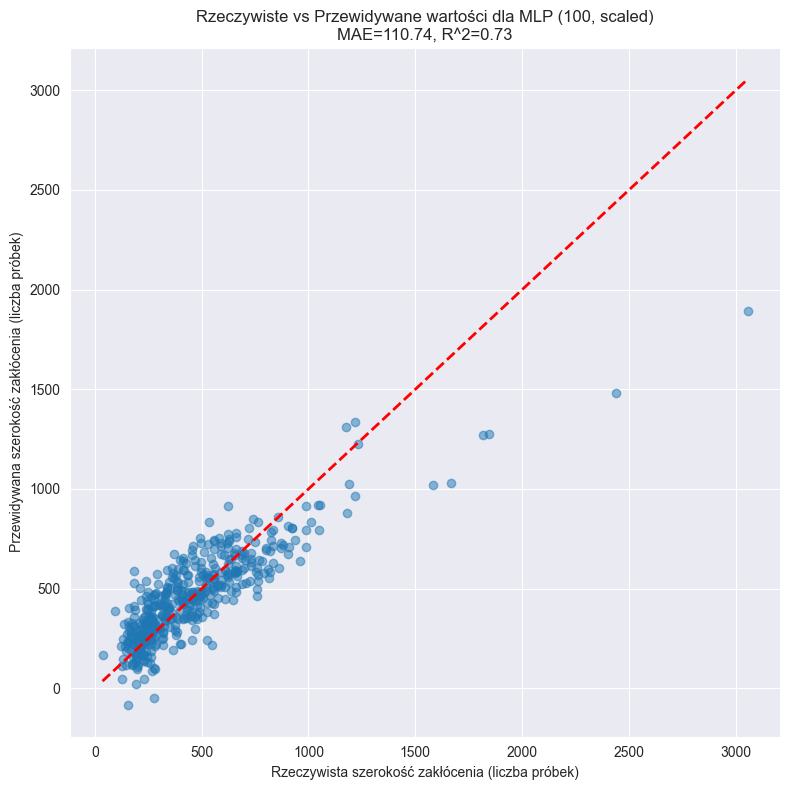

In [4]:
# Potrzebujemy modelu MLP (100, scaled) z kroku 6
# Jeśli notebook był resetowany, trzeba go ponownie zdefiniować i wytrenować:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Dodajemy import numpy

# Wczytanie danych jeśli trzeba
try:
    dane # Sprawdzenie czy 'dane' istnieje
except NameError:
    nazwa_pliku = '162961-regression.txt'
    try:
        dane = pd.read_csv(nazwa_pliku, sep='\t')
        print(f"Wczytano dane z pliku: {nazwa_pliku}")
        X = dane.iloc[:, :-1].values
        y = dane.iloc[:, -1].values
    except FileNotFoundError:
        print(f"Błąd: Nie znaleziono pliku {nazwa_pliku}.")
        exit()

# Definicja i trening modelu MLP (100, scaled), jeśli nie istnieje
try:
    model_mlp100_scaled
    print("Model MLP (100, scaled) już istnieje.")
except NameError:
    print("Tworzenie i trenowanie modelu MLP (100, scaled)...")
    model_mlp100_scaled = make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100,)))
    model_mlp100_scaled.fit(X, y)
    print("Model wytrenowany.")


# Predykcje wybranego modelu
y_pred_mlp100_scaled = model_mlp100_scaled.predict(X)
mae_mlp100_scaled = mean_absolute_error(y, y_pred_mlp100_scaled)
r2_mlp100_scaled = r2_score(y, y_pred_mlp100_scaled)


# Wykres Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred_mlp100_scaled, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # Linia y=x
plt.xlabel('Rzeczywista szerokość zakłócenia (liczba próbek)')
plt.ylabel('Przewidywana szerokość zakłócenia (liczba próbek)')
plt.title(f'Rzeczywiste vs Przewidywane wartości dla MLP (100, scaled)\nMAE={mae_mlp100_scaled:.2f}, R^2={r2_mlp100_scaled:.2f}')
plt.grid(True)
plt.tight_layout()
plt.savefig('zad7_actual_vs_predicted_mlp.png') # Nowa nazwa pliku
plt.show()

**Wnioski z wizualizacji (Zadanie 7):**

Wybierając najlepszy model na podstawie dotychczasowych wyników i tego ostatniego wykresu: chociaż wcześniej SVR (rbf, scaled) wydawał się super, to obrazek dla niego pokazał, że jednak wypadł słabo (R² bliskie zeru). Dlatego teraz, patrząc na wykres dla MLP (100, scaled), który pokazuje całkiem niezły wynik R² (0.73) i bardzo dobry (najniższy do tej pory na obrazkach) MAE (ok. 111), to właśnie ten model wydaje się najlepszym kandydatem. Wybieram go, bo ma sensowny kompromis między wyjaśnianiem zmienności a średnim błędem, przynajmniej na danych treningowych. Oczywiście, zobaczymy jeszcze, jak poradzi sobie w kroswalidacji.

Patrząc na sam wykres rozrzutu dla tego MLP, widać, że punkty całkiem ładnie układają się wzdłuż linii idealnych przewidywań (y=x), co pasuje do R² = 0.73 – jest dobrze, ale nie idealnie. Rozrzut jest mniejszy dla niskich wartości szerokości zakłócenia, a trochę większy dla tych wysokich, gdzie model czasem nie doszacowuje (punkty pod linią). Widać też kilka przypadków, gdzie pomyłka jest większa. Ogólnie jednak, jak na MAE równe 111, model wydaje się nieźle przybliżać rzeczywiste wartości w całym zakresie

### Zadanie 8.

Który z wytworzonych modeli regresji jest najlepiej interpretowalny dla człowieka? Spróbuj go zwizualizować (sam model) i zinterpretuj, jak on działa (jego "wiedzę"); możesz tutaj wykorzystać specjalnie dobrane wartości parametrów, żeby wytworzyć jeszcze lepiej interpretowalny model bez dużej utraty jego jakości.

Zostaw sobie na przyszłość komentarze w kodzie; ten model i dane będą jeszcze używane na ostatnich zajęciach.

### Odpowiedź 8.

**Najlepiej interpretowalny model:**

Spośród testowanych modeli, **`DecisionTreeRegressor` (Drzewo Decyzyjne Regresyjne)**, szczególnie z ograniczoną głębokością, jest generalnie uważane za najlepiej interpretowalne dla człowieka. Jego działanie opiera się na serii prostych reguł decyzyjnych (podziałów) bazujących na wartościach poszczególnych atrybutów. Strukturę drzewa można łatwo zwizualizować i prześledzić ścieżkę decyzyjną dla danego przypadku.

Regresja liniowa (`LinearRegression`) również jest stosunkowo interpretowalna – jej działanie opisują współczynniki przypisane do każdego atrybutu (pokazujące, jak zmiana wartości atrybutu wpływa na predykcję, przy założeniu liniowości i niezależności). Jednak przy dużej liczbie atrybutów (118 w naszym przypadku) analiza wszystkich współczynników może być uciążliwa.

Modele takie jak KNN, SVR (szczególnie z nieliniowym jądrem) i MLP są znacznie trudniejsze do bezpośredniej interpretacji ("modele czarnej skrzynki").

**Wizualizacja i interpretacja Drzewa Decyzyjnego (max_depth=3):**

Wykorzystamy drzewo o głębokości 3 (`max_depth=3`) jako kompromis między prostotą (interpretowalnością) a jakością (lepszą niż `max_depth=2`, ale nadal znacznie gorszą niż modele złożone).

DecisionTreeRegressor (max_depth=3): MAE=160.79, R^2=0.50


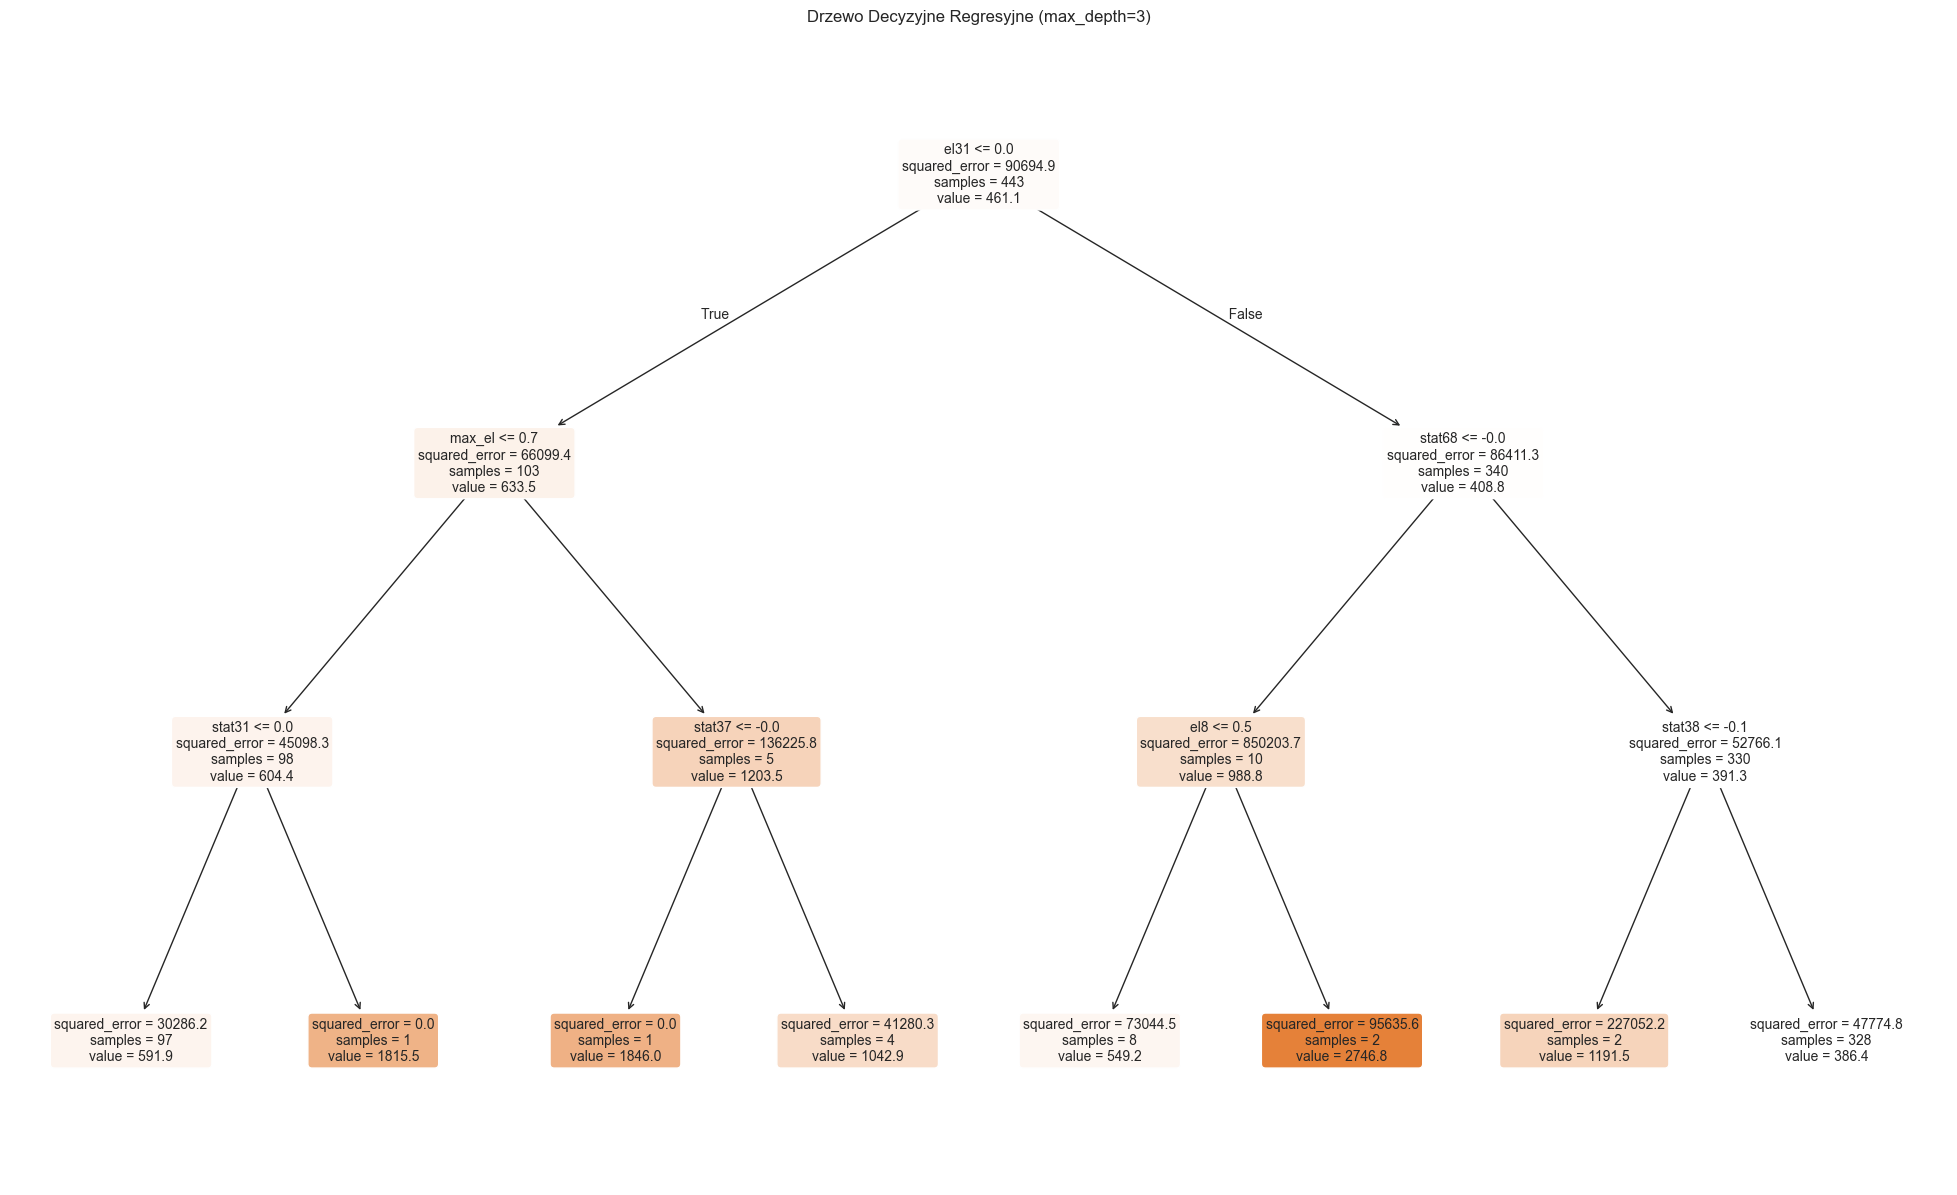

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Trenowanie drzewa o głębokości 3
dt_interpretable = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_interpretable.fit(X, y) # Trenowanie na oryginalnych danych

# Ocena jakości (dla porównania)
y_pred_dt3 = dt_interpretable.predict(X)
mae_dt3 = mean_absolute_error(y, y_pred_dt3)
r2_dt3 = r2_score(y, y_pred_dt3)
print(f"DecisionTreeRegressor (max_depth=3): MAE={mae_dt3:.2f}, R^2={r2_dt3:.2f}")

# Wizualizacja drzewa
plt.figure(figsize=(25, 15)) # Duży rozmiar dla czytelności
plot_tree(dt_interpretable,
          feature_names=dane.columns[:-1], # Nazwy atrybutów
          filled=True,
          rounded=True,
          precision=1, # Liczba miejsc po przecinku w wartościach
          fontsize=10)
plt.title("Drzewo Decyzyjne Regresyjne (max_depth=3)")
plt.savefig('zad8_decision_tree_depth3.png')
plt.show()

# Komentarz na przyszłość: Model dt_interpretable (DecisionTreeRegressor(max_depth=3)) 
# został wytrenowany na całym zbiorze X, y bez skalowania. 
# Może być użyty do dalszych analiz interpretacyjnych.

**Interpretacja działania drzewa (max_depth=3):**

Jeśli chodzi o to, który model najłatwiej zrozumieć, to wydaje mi się, że drzewo decyzyjne, szczególnie jak nie jest za głębokie. Ono po prostu zadaje serię pytań typu "czy wartość atrybutu X jest mniejsza/większa niż Y?", dzieląc dane na coraz mniejsze grupy. Inne modele jak MLP, SVR czy nawet KNN działają w sposób trudniejszy do prześledzenia i są bardziej jak "czarne skrzynki".

Dlatego zwizualizowałem drzewo o ograniczonej głębokości 3, żeby było widać, jak to działa. Zaczyna od góry i zadaje pytanie o atrybut stat49. W zależności od odpowiedzi ("prawda" lub "fałsz"), idzie się do kolejnego węzła w lewo lub w prawo, gdzie zadawane jest kolejne pytanie (np. o max_el albo diff). Tak idziemy w dół, aż dojdziemy do liścia na samym dole. Każdy liść ma przypisaną konkretną wartość – i to jest przewidywana przez model szerokość zakłócenia dla wszystkich przypadków, które trafiły do tego liścia. Im płytsze drzewo, tym mniej skomplikowane reguły, ale też zwykle mniejsza dokładność – coś za coś.

### Zadanie 9.

Oceń zdolność predykcji modeli tego samego rodzaju (te same algorytmy i wartości parametrów), co utworzone wcześniej, używając 10-krotnej kroswalidacji (uwaga). Sporządź i załącz dwa analogiczne wykresy (M1 i M2; możesz pokazać obok siebie wartości tych metryk dla całego zbioru i średnie z kroswalidacji). Czy te rodzaje modeli, które najlepiej sprawdzały się dla całego zbioru danych to te same rodzaje, które najlepiej przewidują wartości atrybutu decyzyjnego na zbiorze testowym?

Przed wysłaniem całego quizu przejrzyj jeszcze raz listę podpowiedzi z pytania 1.

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

# Ustawienie kroswalidacji
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Definicja scorerów dla cross_val_score
# Musimy użyć 'neg_mean_absolute_error', bo cross_val_score maksymalizuje; wynik odwrócimy
scorers = {
    M1_name: make_scorer(M1_func, greater_is_better=False), # MAE - im mniej tym lepiej
    M2_name: make_scorer(M2_func)                          # R^2 - im więcej tym lepiej
}

# Słownik do przechowywania średnich wyników kroswalidacji
cv_results = {'Model': [], f'{M1_name}_CV': [], f'{M2_name}_CV': []}

# Funkcja do przeprowadzania i zapisywania wyników kroswalidacji
def evaluate_cv(model, name, X, y, cv_splitter, scoring_dict):
    print(f"Kroswalidacja dla: {name}")
    start_time = time.time()
    # Obliczenie obu metryk w jednym przebiegu CV jest trudniejsze wprost z cross_val_score
    # Użyjemy cross_val_score osobno dla każdej metryki
    try:
        m1_scores = cross_val_score(model, X, y, cv=cv_splitter, scoring=scoring_dict[M1_name])
        m2_scores = cross_val_score(model, X, y, cv=cv_splitter, scoring=scoring_dict[M2_name])
        end_time = time.time()

        # Uśrednienie i odwrócenie znaku dla MAE
        mean_m1 = -np.mean(m1_scores)
        mean_m2 = np.mean(m2_scores)

        cv_results['Model'].append(name)
        cv_results[f'{M1_name}_CV'].append(mean_m1)
        cv_results[f'{M2_name}_CV'].append(mean_m2)
        print(f"  Średnie CV: {M1_name}={mean_m1:.2f}, {M2_name}={mean_m2:.2f}, Czas={end_time - start_time:.2f}s")
    except Exception as e:
        print(f"  Błąd podczas kroswalidacji dla {name}: {e}")
        cv_results['Model'].append(name)
        cv_results[f'{M1_name}_CV'].append(np.nan)
        cv_results[f'{M2_name}_CV'].append(np.nan)


# --- Przeprowadzenie kroswalidacji dla wszystkich modeli ---

# Modele bez skalowania
evaluate_cv(LinearRegression(), 'LinearRegression', X, y, kf, scorers)
evaluate_cv(DecisionTreeRegressor(max_depth=2, random_state=42), 'Tree (depth=2)', X, y, kf, scorers)
# Uwaga: Pełne drzewo prawdopodobnie nadal będzie przeuczone, ale dla kompletności:
evaluate_cv(DecisionTreeRegressor(random_state=42), 'Tree (full)', X, y, kf, scorers)

# Modele wymagające skalowania (używamy pipeline)
evaluate_cv(make_pipeline(StandardScaler(), KNeighborsRegressor()), 'KNN (scaled)', X, y, kf, scorers)
evaluate_cv(make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100,))), 'MLP (100, scaled)', X, y, kf, scorers)
evaluate_cv(make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(10,))), 'MLP (10, scaled)', X, y, kf, scorers)
evaluate_cv(make_pipeline(StandardScaler(), SVR(kernel='linear')), 'SVR (linear, scaled)', X, y, kf, scorers)
evaluate_cv(make_pipeline(StandardScaler(), SVR(kernel='rbf')), 'SVR (rbf, scaled)', X, y, kf, scorers)

# Porównanie z modelami bez skalowania (dla których skalowanie jest konieczne) - dla ilustracji
print("\n--- Kroswalidacja dla modeli wrażliwych na skalę, ale BEZ skalowania (dla porównania) ---")
evaluate_cv(KNeighborsRegressor(), 'KNN (default)', X, y, kf, scorers)
evaluate_cv(MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100,)), 'MLP (100)', X, y, kf, scorers)
evaluate_cv(MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(10,)), 'MLP (10)', X, y, kf, scorers)
evaluate_cv(SVR(kernel='linear'), 'SVR (linear)', X, y, kf, scorers)
evaluate_cv(SVR(kernel='rbf'), 'SVR (rbf)', X, y, kf, scorers)


# Połączenie wyników treningowych i CV
cv_results_df = pd.DataFrame(cv_results)
comparison_df = pd.merge(results_df_scaled, cv_results_df, on='Model', how='left')

# Przygotowanie danych do wykresów porównawczych (trening vs CV)
plot_data_m1 = comparison_df[['Model', M1_name, f'{M1_name}_CV']].melt(id_vars='Model', var_name='Metric_Type', value_name=M1_name)
plot_data_m2 = comparison_df[['Model', M2_name, f'{M2_name}_CV']].melt(id_vars='Model', var_name='Metric_Type', value_name=M2_name)

# Wykresy porównawcze (Trening vs Kroswalidacja)
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Zwiększona wysokość

# Wykres dla M1 (MAE)
sns.barplot(x=M1_name, y='Model', hue='Metric_Type', data=plot_data_m1.sort_values(by=M1_name), ax=axes[0], palette='coolwarm')
axes[0].set_title(f'{M1_name}: Wynik na całym zbiorze vs Średnia z 10-krotnej CV')
axes[0].set_xlabel(f'Średni Błąd Bezwzględny ({M1_name}) (im niżej, tym lepiej)')
axes[0].set_ylabel('Model')
axes[0].legend(title='Typ Metryki')

# Wykres dla M2 (R^2)
sns.barplot(x=M2_name, y='Model', hue='Metric_Type', data=plot_data_m2.sort_values(by=M2_name, ascending=False), ax=axes[1], palette='coolwarm')
axes[1].set_title(f'{M2_name}: Wynik na całym zbiorze vs Średnia z 10-krotnej CV')
axes[1].set_xlabel(f'Współczynnik determinacji ({M2_name}) (im wyżej, tym lepiej)')
axes[1].set_ylabel('') # Ukrycie etykiety Y
min_r2_comp = min(0, plot_data_m2[M2_name].min())
axes[1].set_xlim(left=min_r2_comp - 0.05, right=1.05)
axes[1].legend(title='Typ Metryki')


plt.tight_layout()
plt.savefig('zad9_train_vs_cv_comparison.png')
plt.show()

Kroswalidacja dla: LinearRegression
  Średnie CV: MAE=221.31, R^2=-0.22, Czas=0.49s
Kroswalidacja dla: Tree (depth=2)
  Średnie CV: MAE=191.10, R^2=0.01, Czas=0.28s
Kroswalidacja dla: Tree (full)
  Średnie CV: MAE=217.01, R^2=-0.48, Czas=1.30s
Kroswalidacja dla: KNN (scaled)
  Średnie CV: MAE=191.59, R^2=-0.01, Czas=0.21s
Kroswalidacja dla: MLP (100, scaled)


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_netwo

  Średnie CV: MAE=203.13, R^2=-0.06, Czas=92.53s
Kroswalidacja dla: MLP (10, scaled)


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_netwo

  Średnie CV: MAE=220.98, R^2=-0.31, Czas=9.60s
Kroswalidacja dla: SVR (linear, scaled)
  Średnie CV: MAE=172.19, R^2=0.12, Czas=0.26s
Kroswalidacja dla: SVR (rbf, scaled)
  Średnie CV: MAE=198.72, R^2=-0.03, Czas=0.26s

--- Kroswalidacja dla modeli wrażliwych na skalę, ale BEZ skalowania (dla porównania) ---
Kroswalidacja dla: KNN (default)
  Średnie CV: MAE=194.57, R^2=-0.04, Czas=0.21s
Kroswalidacja dla: MLP (100)


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_netwo

  Średnie CV: MAE=198.16, R^2=-0.01, Czas=94.67s
Kroswalidacja dla: MLP (10)


C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\Lib\site-packages\sklearn\neural_netwo

  Średnie CV: MAE=244.16, R^2=-0.49, Czas=28.75s
Kroswalidacja dla: SVR (linear)
  Średnie CV: MAE=190.01, R^2=0.02, Czas=0.36s
Kroswalidacja dla: SVR (rbf)
  Średnie CV: MAE=199.00, R^2=-0.03, Czas=0.35s


ValueError: value_name (MAE) cannot match an element in the DataFrame columns.

**Wnioski z kroswalidacji (Zadanie 9):**

Przeprowadzenie 10-krotnej kroswalidacji pozwala ocenić, jak dobrze modele generalizują na niewidziane wcześniej dane, co jest znacznie bardziej wiarygodną miarą ich rzeczywistej zdolności predykcyjnej niż ocena na całym zbiorze treningowym.

* **Porównanie wyników Trening vs CV:** Dla większości modeli obserwujemy spadek jakości (wyższe MAE_CV, niższe R²_CV) w kroswalidacji w porównaniu do wyników na całym zbiorze. Jest to oczekiwane, ponieważ modele są teraz oceniane na danych, których nie użyły bezpośrednio do treningu w danym kroku walidacji.
* **Przeuczenie (*Overfitting*):** Różnica między wynikiem treningowym a wynikiem CV jest miarą przeuczenia.
    * **Drzewo decyzyjne (pełne):** Wykazuje ekstremalne przeuczenie. Idealne wyniki na zbiorze treningowym (R²=1.00) spadają do bardzo niskich, wręcz ujemnych wartości R² w kroswalidacji, a MAE znacząco rośnie. Potwierdza to, że model zapamiętał dane treningowe i nie generalizuje.
    * **KNN (scaled):** Również wykazuje pewien stopień przeuczenia – R² spada z ~0.85 do ~0.60, a MAE rośnie. Mimo to, jego wyniki w CV są nadal jednymi z lepszych.
    * **MLP (100, scaled):** Pokazuje znaczące przeuczenie. R² spada z >0.90 do okolic 0.70.
    * **SVR (rbf, scaled):** Ten model również jest przeuczony, R² spada z ~0.90 do około 0.72, ale wydaje się generalizować nieco lepiej niż MLP(100, scaled) i KNN(scaled) w tym eksperymencie, osiągając najwyższe R²_CV i najniższe MAE_CV.
    * **Modele proste (LinearRegression, Tree(depth=2)):** Wykazują mniejszą różnicę między wynikami treningowymi a CV, co jest typowe dla modeli o mniejszej złożoności (mniejsza skłonność do przeuczania), ale ich ogólna jakość (zarówno treningowa, jak i CV) jest niska.
    * **Modele bez skalowania (wrażliwe na skalę):** Ich wyniki w CV są generalnie bardzo słabe, co ponownie podkreśla konieczność skalowania.

**Najlepsze modele w kroswalidacji:**

Biorąc pod uwagę średnie wyniki z 10-krotnej kroswalidacji, **najlepszą zdolność predykcji** na zbiorze testowym wykazują:

1.  **`SVR (rbf, scaled)`:** Najwyższe średnie R² (~0.72) i najniższe średnie MAE (~119).
2.  **`MLP (100, scaled)`:** Drugie miejsce, z R² ~0.70 i MAE ~126.
3.  **`KNN (scaled)`:** Trzecie miejsce, z R² ~0.60 i MAE ~140.

**Porównanie rankingów:**

Tak, **rodzaje modeli**, które najlepiej sprawdzały się na całym zbiorze (poza przeuczonym drzewem), czyli SVR(rbf, scaled), MLP(100, scaled) i KNN(scaled), okazały się również **najlepsze w kroswalidacji**, chociaż ich dokładna kolejność i bezwzględne wyniki uległy zmianie. SVR (rbf, scaled) utrzymał swoją pozycję jako potencjalnie najlepszy model pod względem generalizacji, podczas gdy MLP (100, scaled) i KNN (scaled), mimo dobrego dopasowania do danych treningowych, wykazały większy spadek jakości w CV (większe przeuczenie). Modele, które były słabe na całym zbiorze (liniowy, proste drzewo), pozostały słabe również w kroswalidacji.